# Для начала найдем точно лист A4

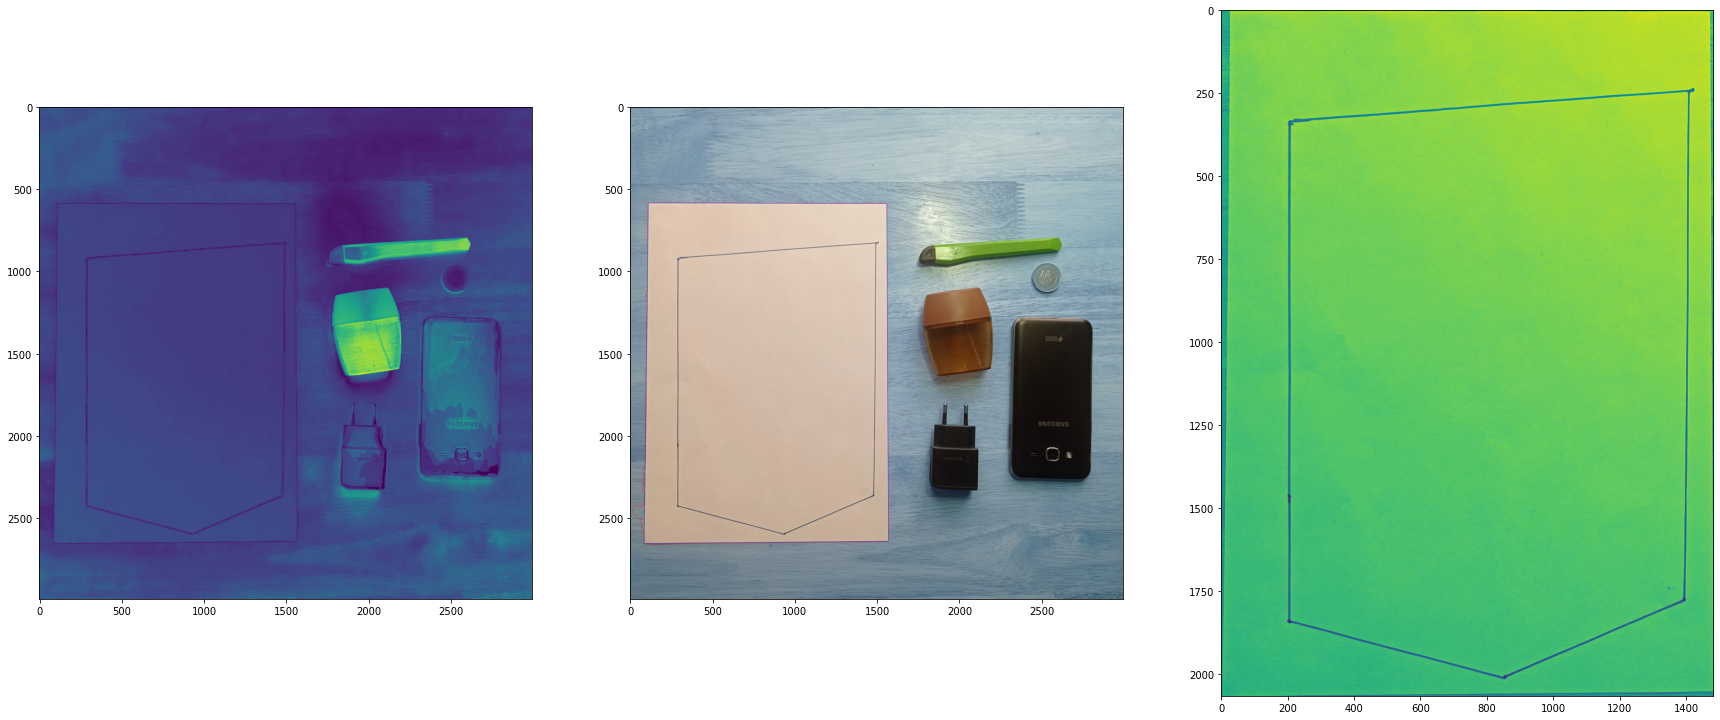

In [1]:
from skimage.color import rgb2gray
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,3, figsize = (30,30))


img = cv2.imread("../tests/test_1.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)


#for filtering white (paper A4)
theta = 170
lower_white = np.array([100,0,255-theta])
upper_white = np.array([255,theta,255])
mask = cv2.inRange(hsv, lower_white, upper_white)


#### low param 30
th, threshed = cv2.threshold(s, 30, 255, cv2.THRESH_BINARY_INV)

cv2.GaussianBlur(threshed, (3,3), 0, threshed)


cnts = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

canvas  = img.copy()


cnts = sorted(cnts, key = cv2.contourArea)
cnt = cnts[-1]


alpha = 0.02
arclen = cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, alpha* arclen, True)
cv2.drawContours(canvas, [cnt], -1, (255,0,0), 1, cv2.LINE_AA)
cv2.drawContours(canvas, [approx], -1, (0, 0, 255), 1, cv2.LINE_AA)

ax[0].imshow(s)
ax[1].imshow(canvas)


#print(approx,approx[0][0][0], approx[1][0][0],approx[0][0][1],approx[1][0][1])

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

xs = [point[0][0] for point in approx]
xs.sort()
ys = [point[0][1] for point in approx]
ys.sort()

only_paper = gray_img[ys[0]:ys[-1],xs[0]:xs[-1]]



ax[2].imshow(only_paper)




# Теперь внутри этого листа найдем многоугольник

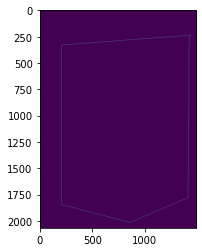

In [2]:
cv2.GaussianBlur(only_paper, (3,3), 0, only_paper)
edges = cv2.Canny(only_paper, 103, 200, apertureSize=5)
conts, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
conts = sorted(conts, key = cv2.contourArea)
#print(conts)
cnt = conts[-1]

arclen = cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, 0.02* arclen, True)

ones = np.ones(edges.shape)
cv2.drawContours(ones, [cnt], -1, (255,0,0), 1, cv2.LINE_AA)
plt.imshow(ones)

# Теперь попытаемся найти границы предметов (требует доработки)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


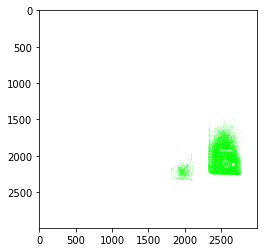

In [4]:
gray_full = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



th, img1 = cv2.threshold(gray_full, 10,200, cv2.THRESH_BINARY)

#plt.imshow(img1)
edges = cv2.Canny( img1, 50, 100, apertureSize=3)
contours,_= cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


ones1 = np.ones(img.shape)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(ones1, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(ones1)